**Dataset description :**
- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

*  Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*  Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents







Importing libraries

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


sns.set()
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }


Loading the Dataset

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Telecom dataset.csv to Telecom dataset.csv


In [8]:
import io
telecom_customers = pd.read_csv(io.BytesIO(uploaded['Telecom dataset.csv']))

In [29]:
telecom_customers.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


To build our model, we need to obtain all the attributes of the database






In [31]:
telecom_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
telecom_customers.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [35]:
telecom_customers.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [37]:
telecom_customers.drop('customerID',axis = 1 ,inplace = True)

In [38]:
telecom_customers.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


TotalCharges column

In [ ]:
telecom_customers.TotalCharges.describe()

In [39]:
print(len(telecom_customers[telecom_customers['TotalCharges'] == ' ']),'\n')
telecom_customers[telecom_customers['TotalCharges'] == ' '].T

11 



,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes
OnlineBackup,No,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,Yes,Yes


In [40]:
telecom_customers.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [42]:
telecom_customers['TotalCharges'] = pd.to_numeric(telecom_customers['TotalCharges'],errors='coerce')

In [43]:
len(telecom_customers[telecom_customers['TotalCharges'] == ' '])

0

In [44]:
telecom_customers.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [45]:
telecom_customers['TotalCharges'] = telecom_customers['TotalCharges'].fillna(telecom_customers['TotalCharges'].median())

In [46]:
telecom_customers.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

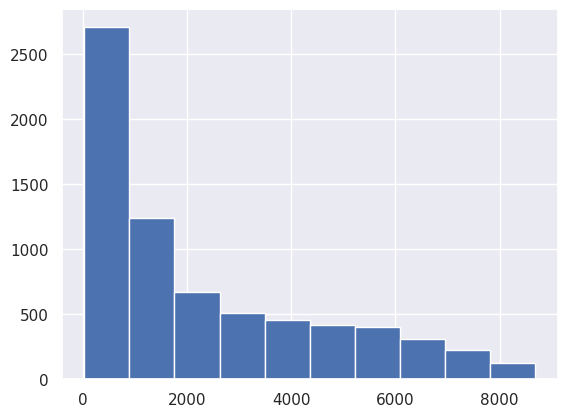

In [47]:
telecom_customers['TotalCharges'].hist()

Cleaning Data

In [50]:
telecom_customers.columns = telecom_customers.columns.str.lower()

In [51]:
telecom_customers.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [52]:
telecom_customers.churn = (telecom_customers.churn == 'Yes').astype(int)
telecom_customers.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [54]:
telecom_customers.churn .value_counts()

0    5174
1    1869
Name: churn, dtype: int64

Exploratory data analysis

In [55]:
telecom_customers['seniorcitizen'] = telecom_customers['seniorcitizen'].astype(object)

In [56]:
categorical  =list(telecom_customers.select_dtypes(include = ['object']).columns)
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [57]:
numerical  =list(telecom_customers.select_dtypes(include = ['number']).columns)
numerical

['tenure', 'monthlycharges', 'totalcharges', 'churn']

In [58]:
numerical  .remove('churn')
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [59]:
telecom_customers[categorical] .nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [60]:
telecom_customers[numerical] .nunique()

tenure              73
monthlycharges    1585
totalcharges      6531
dtype: int64

In [61]:
global_mean = telecom_customers.churn.mean()
round(global_mean,2)

0.27

In [62]:
churn_gender= telecom_customers.groupby('gender').churn.mean()
churn_gender

gender
Female    0.269209
Male      0.261603
Name: churn, dtype: float64

In [63]:
churn_partner = telecom_customers.groupby('partner').churn.mean()
churn_partner

partner
No     0.329580
Yes    0.196649
Name: churn, dtype: float64

In [64]:
gender_risk = churn_gender / global_mean
gender_risk

gender
Female    1.014466
Male      0.985807
Name: churn, dtype: float64

In [65]:
partner_risk = churn_partner / global_mean
partner_risk

partner
No     1.241964
Yes    0.741038
Name: churn, dtype: float64

In [66]:
from IPython.display import display
for  feature in categorical :
    telecom_customers_group = telecom_customers.groupby(by=feature).churn.agg(['mean'])
    telecom_customers_group['diff'] = telecom_customers_group['mean'] - global_mean
    telecom_customers_group['risk'] = telecom_customers_group['mean'] / global_mean

    display(telecom_customers_group)

,mean,diff,risk
gender,,,
Female,0.269209,0.003839,1.014466
Male,0.261603,-0.003766,0.985807


,mean,diff,risk
seniorcitizen,,,
0,0.236062,-0.029308,0.889557
1,0.416813,0.151443,1.570686


,mean,diff,risk
partner,,,
No,0.329580,0.064210,1.241964
Yes,0.196649,-0.068721,0.741038


,mean,diff,risk
dependents,,,
No,0.312791,0.047422,1.178700
Yes,0.154502,-0.110868,0.582215


,mean,diff,risk
phoneservice,,,
No,0.249267,-0.016103,0.939319
Yes,0.267096,0.001726,1.006506


,mean,diff,risk
multiplelines,,,
No,0.250442,-0.014927,0.943749
No phone service,0.249267,-0.016103,0.939319
Yes,0.286099,0.020729,1.078114


,mean,diff,risk
internetservice,,,
DSL,0.189591,-0.075779,0.714441
Fiber optic,0.418928,0.153558,1.578656
No,0.074050,-0.191320,0.279044


,mean,diff,risk
onlinesecurity,,,
No,0.417667,0.152297,1.573906
No internet service,0.074050,-0.191320,0.279044
Yes,0.146112,-0.119258,0.550597


,mean,diff,risk
onlinebackup,,,
No,0.399288,0.133918,1.504645
No internet service,0.074050,-0.191320,0.279044
Yes,0.215315,-0.050055,0.811377


,mean,diff,risk
deviceprotection,,,
No,0.391276,0.125906,1.474456
No internet service,0.074050,-0.191320,0.279044
Yes,0.225021,-0.040349,0.847951


,mean,diff,risk
techsupport,,,
No,0.416355,0.150985,1.568960
No internet service,0.074050,-0.191320,0.279044
Yes,0.151663,-0.113706,0.571517


,mean,diff,risk
streamingtv,,,
No,0.335231,0.069861,1.263261
No internet service,0.074050,-0.191320,0.279044
Yes,0.300702,0.035332,1.133143


,mean,diff,risk
streamingmovies,,,
No,0.336804,0.071434,1.269188
No internet service,0.074050,-0.191320,0.279044
Yes,0.299414,0.034044,1.128291


,mean,diff,risk
contract,,,
Month-to-month,0.427097,0.161727,1.609440
One year,0.112695,-0.152675,0.424672
Two year,0.028319,-0.237051,0.106714


,mean,diff,risk
paperlessbilling,,,
No,0.163301,-0.102069,0.615371
Yes,0.335651,0.070281,1.264842


,mean,diff,risk
paymentmethod,,,
Bank transfer (automatic),0.167098,-0.098271,0.629681
Credit card (automatic),0.152431,-0.112939,0.574410
Electronic check,0.452854,0.187484,1.706502
Mailed check,0.191067,-0.074303,0.720003


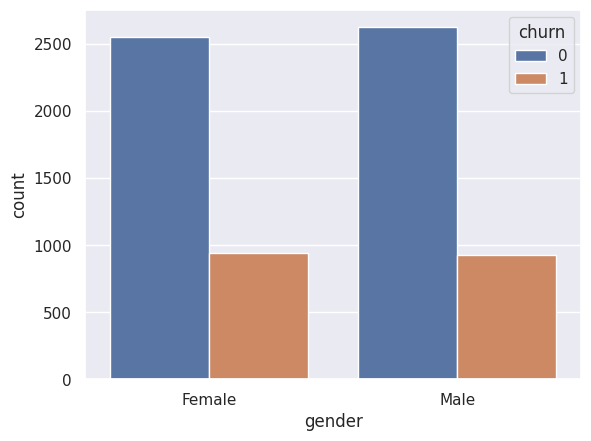

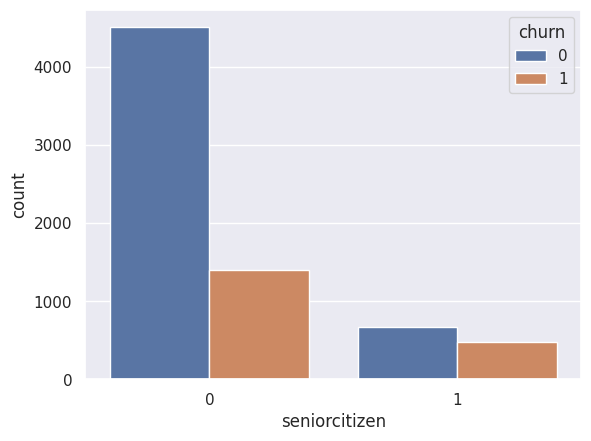

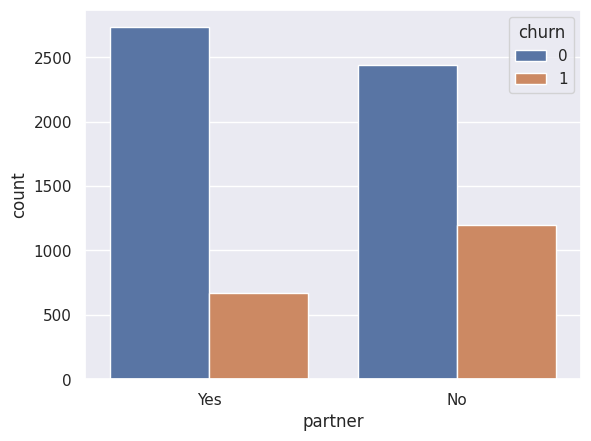

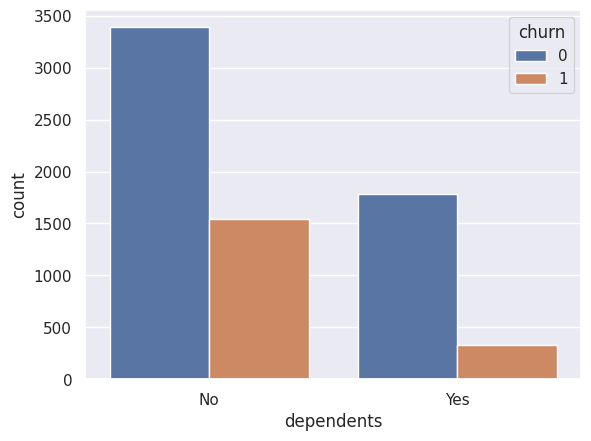

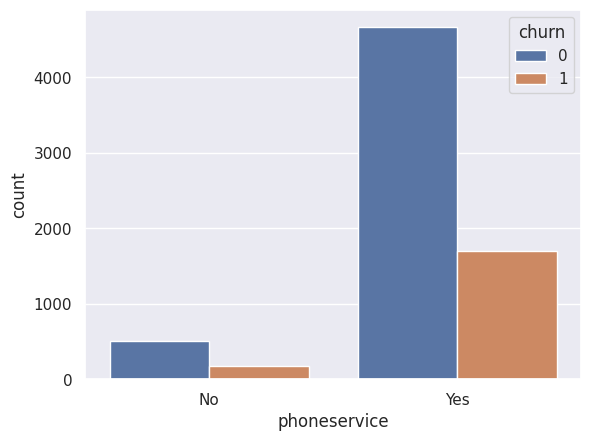

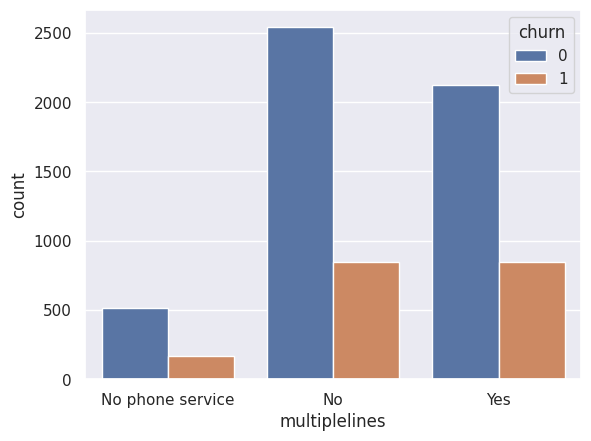

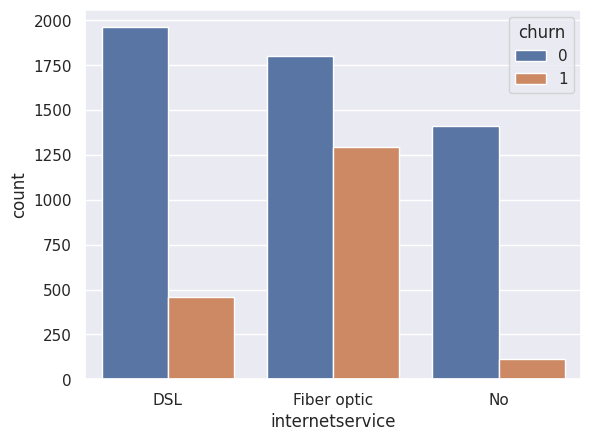

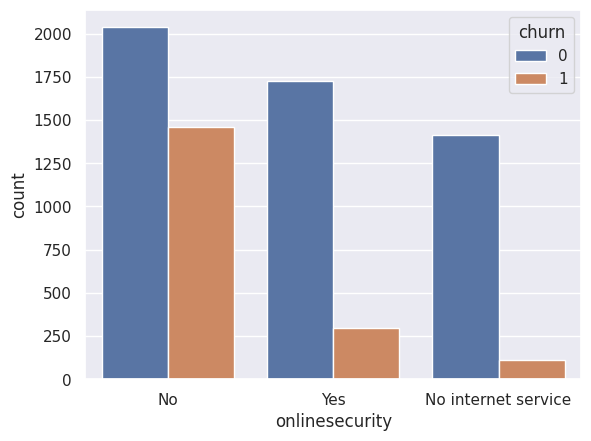

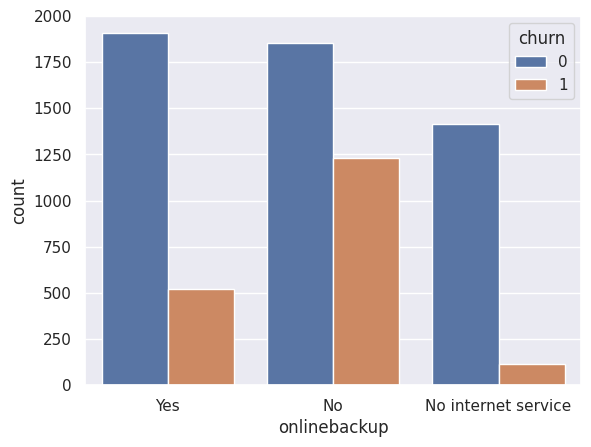

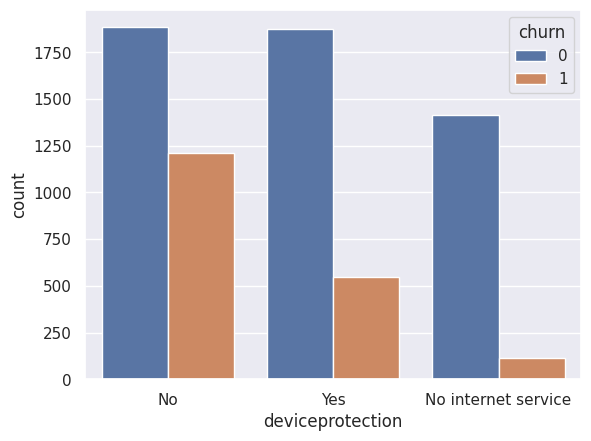

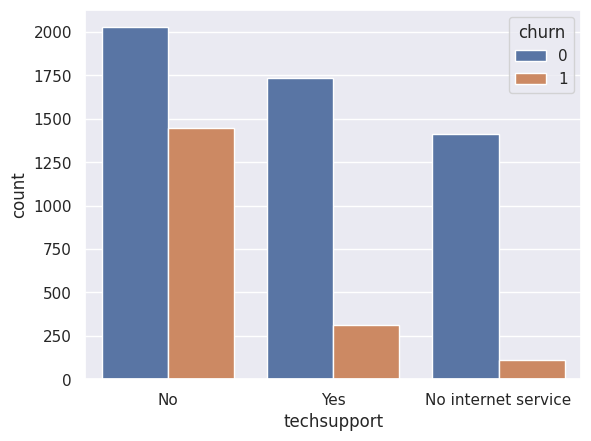

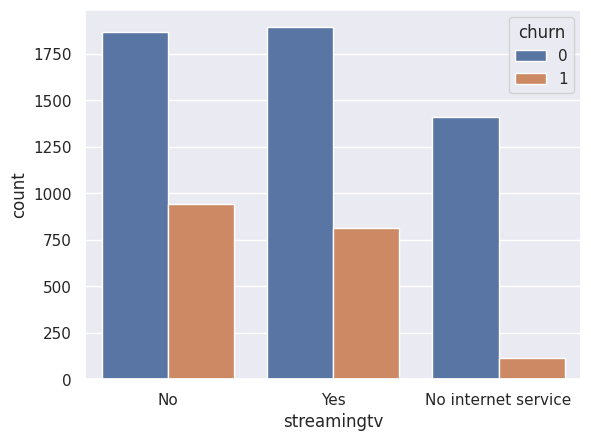

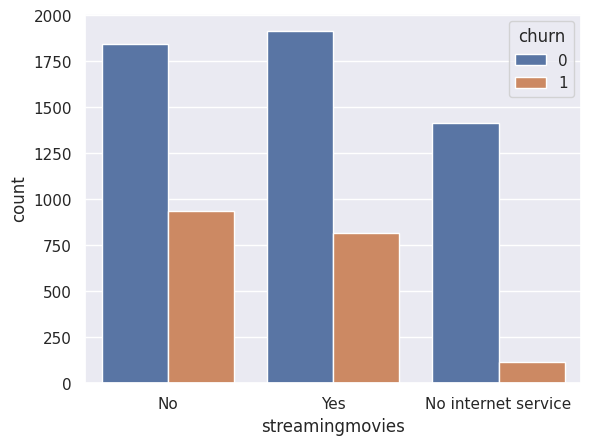

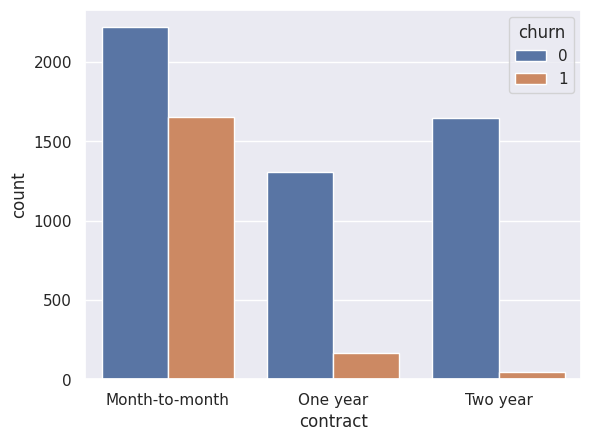

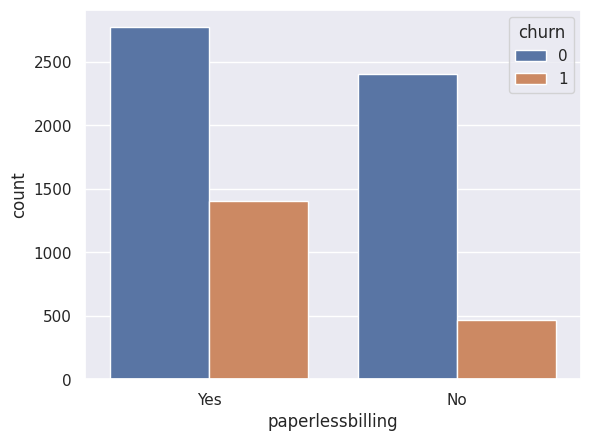

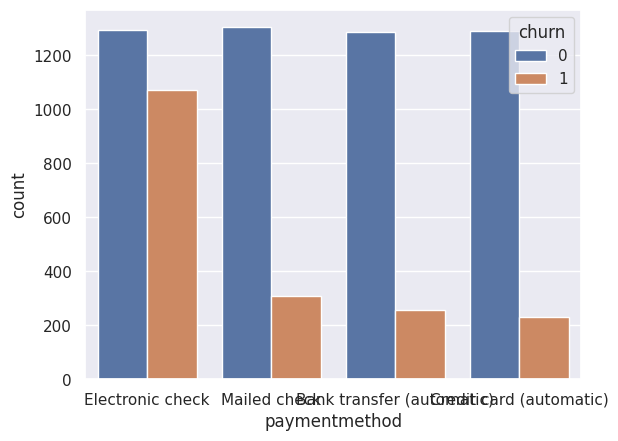

In [68]:
for feature in categorical :
    _=sns.countplot(x= feature , hue = 'churn',data  =telecom_customers)
    plt.show()

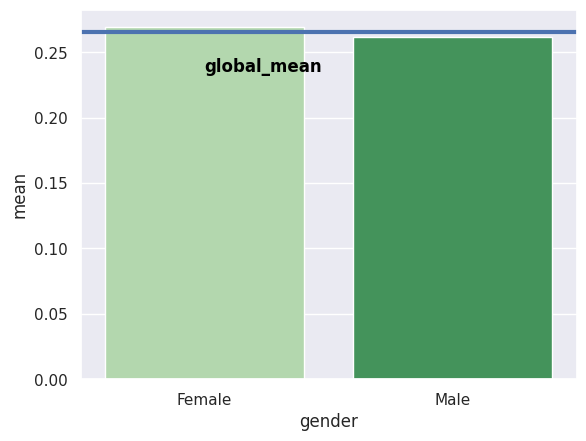

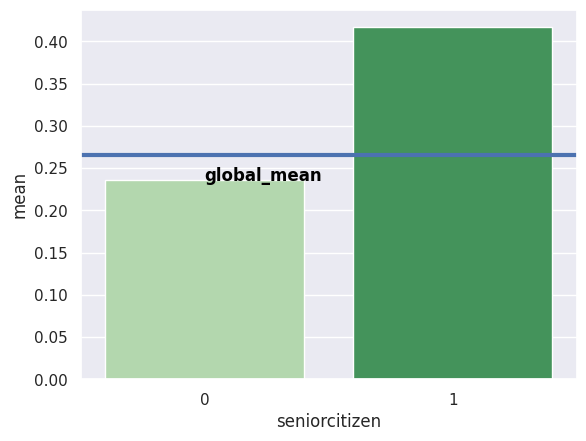

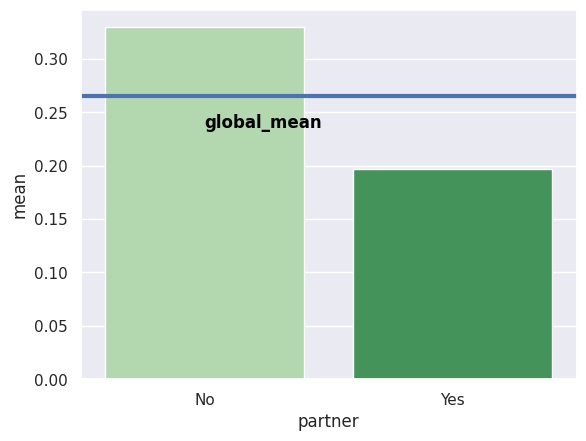

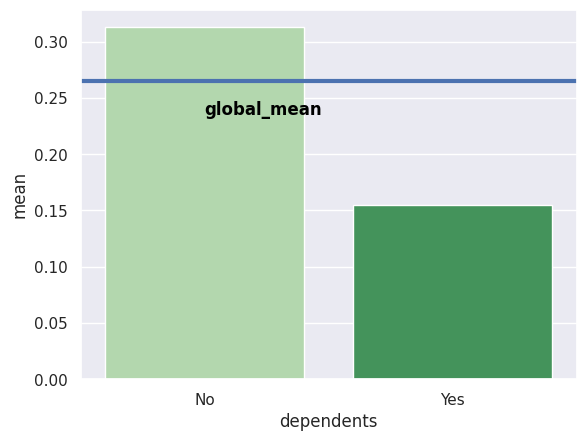

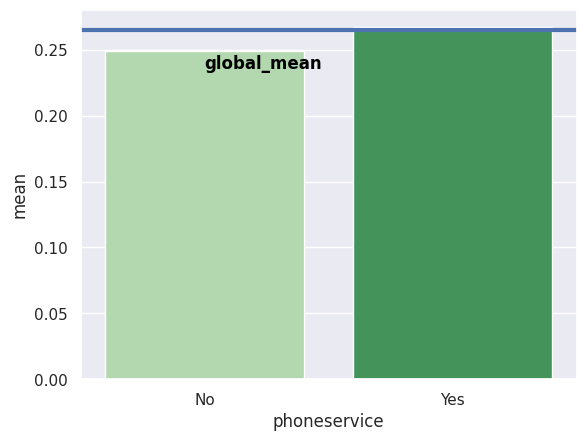

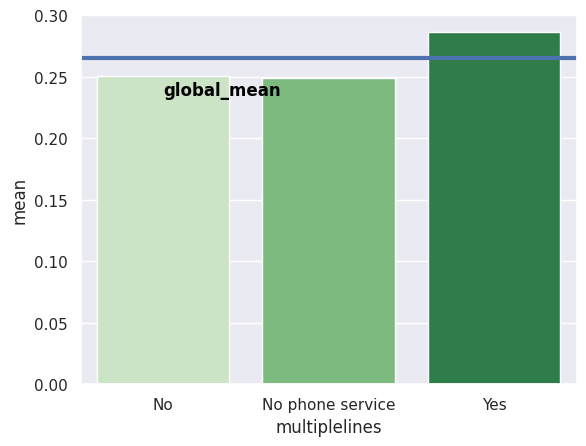

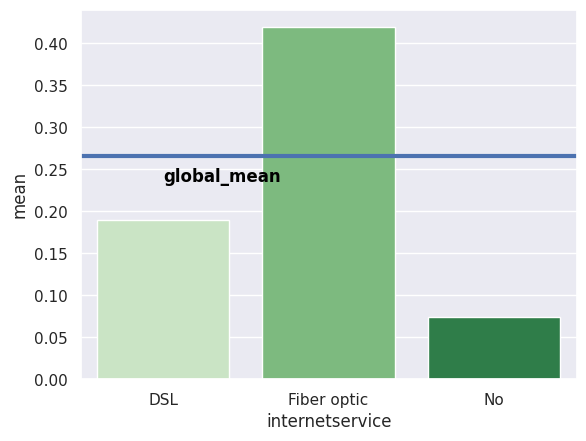

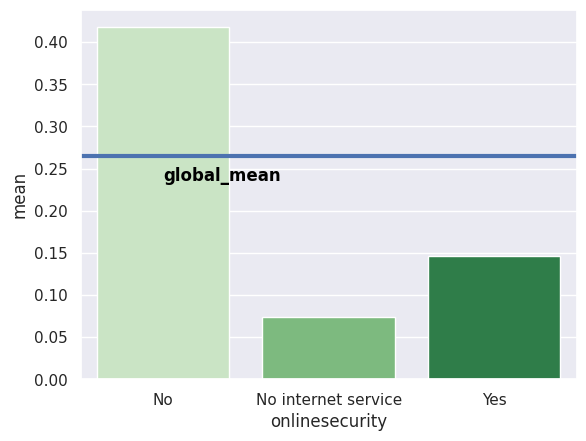

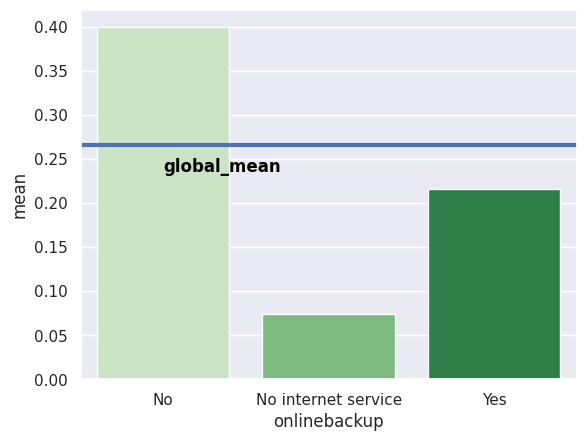

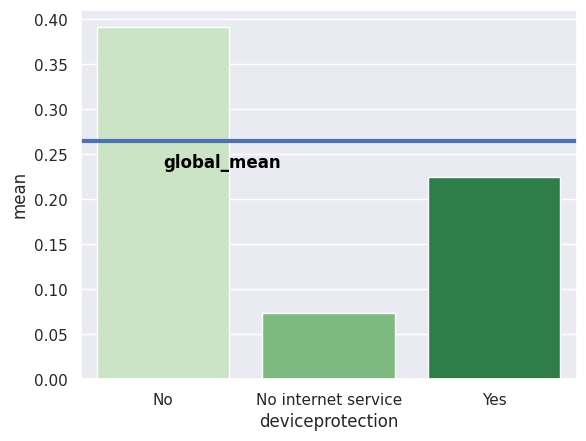

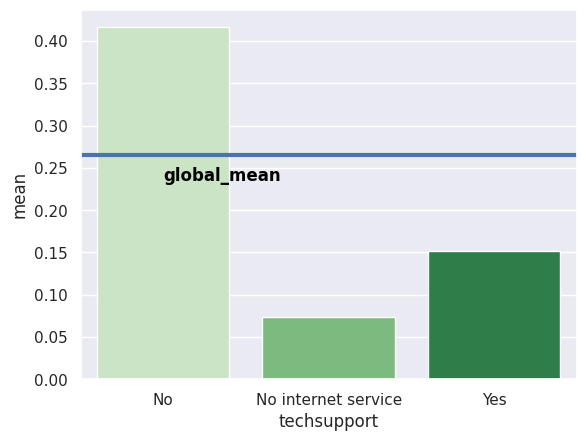

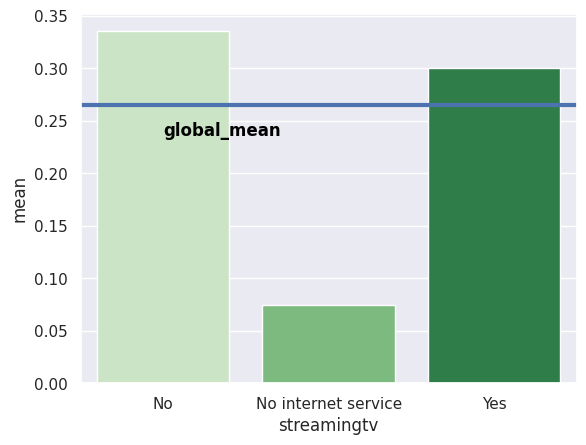

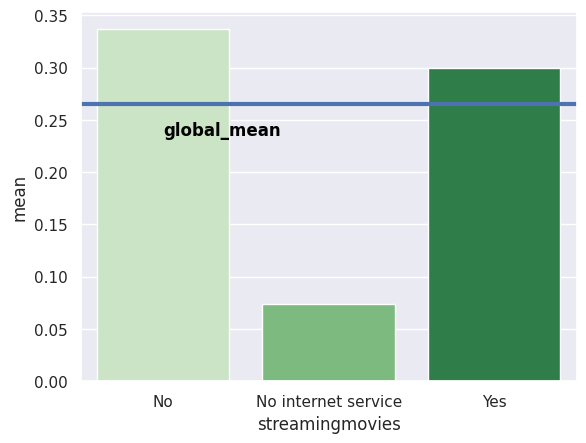

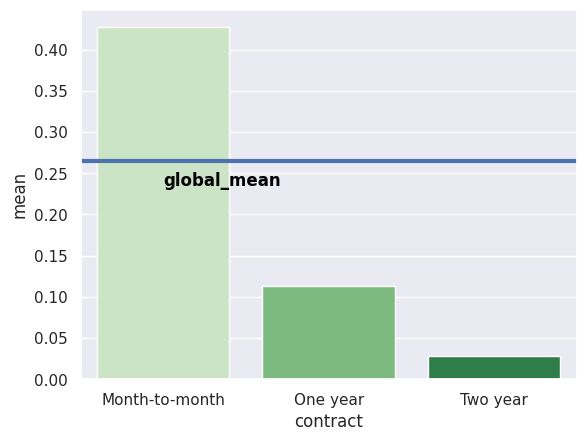

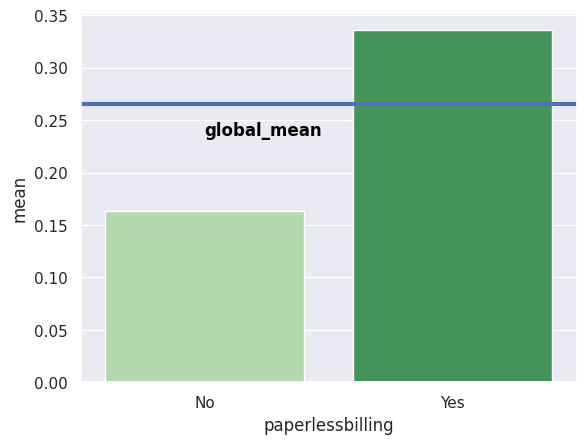

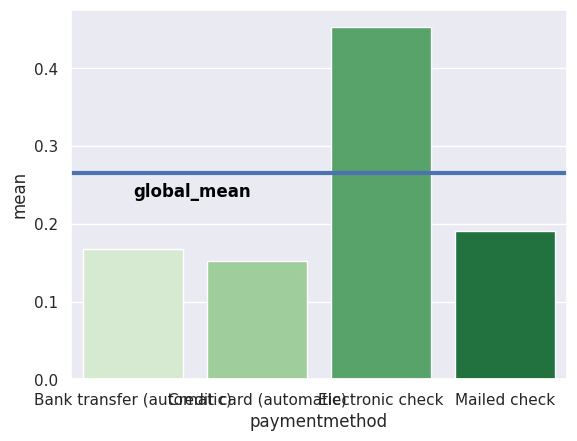

In [69]:
for feature in categorical:
    df_group = telecom_customers.groupby(by=feature).churn.agg(['mean']).reset_index()
    graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')
    graph.axhline(global_mean, linewidth=3, color='b')
    plt.text(0, global_mean - 0.03, "global_mean", color='black', weight='semibold')
    plt.show()

In [71]:
from sklearn.model_selection import train_test_split

telecom_customers_full_train, telecom_customers_test = train_test_split(telecom_customers, test_size=0.2, random_state=1)
telecom_customers_train, telecom_customers_valid = train_test_split(telecom_customers_full_train, test_size=0.2, random_state=1)
print("Training Data Size: ", telecom_customers_train.shape)
print("Validation Data Size: ", telecom_customers_valid.shape)
print("Testing Data Size: ", telecom_customers_test.shape)

Training Data Size:  (4507, 20)
Validation Data Size:  (1127, 20)
Testing Data Size:  (1409, 20)


In [74]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, telecom_customers_train.churn)

telecom_customers_mi = telecom_customers_train[categorical].apply(calculate_mi)
telecom_customers_mi = telecom_customers_mi.sort_values(ascending=False).to_frame(name='MI')
display(telecom_customers_mi.head())
display(telecom_customers_mi.tail())

,MI
contract,0.100378
onlinesecurity,0.062802
techsupport,0.059945
internetservice,0.053951
onlinebackup,0.044230


,MI
partner,0.009443
seniorcitizen,0.008396
multiplelines,0.000821
gender,0.000099
phoneservice,0.000098


In [75]:
telecom_customers[numerical].corrwith(telecom_customers.churn)

tenure           -0.352229
monthlycharges    0.193356
totalcharges     -0.199037
dtype: float64

Preprocessing

In [76]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder(drop='first')

transformer = make_column_transformer((ohe, categorical), remainder='passthrough',
                                      verbose_feature_names_out=False)

train_enc = transformer.fit_transform(telecom_customers_train)
telecom_customers_train_enc = pd.DataFrame(train_enc, columns=transformer.get_feature_names_out())
telecom_customers_train_enc

,gender_Male,seniorcitizen_1,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,...,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,tenure,monthlycharges,totalcharges,churn
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,30.0,19.70,625.05,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,23.0,83.75,1849.95,0.0
2,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,14.0,95.80,1346.30,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,56.0,19.70,1051.90,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,63.0,98.00,6218.45,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,52.0,80.85,4079.55,0.0
4503,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,18.0,25.15,476.80,0.0
4504,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,90.00,190.05,1.0
4505,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,27.0,24.50,761.95,0.0


In [77]:
X_train = telecom_customers_train_enc.drop('churn', axis=1)
y_train = telecom_customers_train_enc['churn']

In [78]:
valid_enc = transformer.transform(telecom_customers_valid)
telecom_customers_valid_enc = pd.DataFrame(valid_enc, columns=transformer.get_feature_names_out())
X_valid = telecom_customers_valid_enc.drop('churn', axis=1)
y_valid = telecom_customers_valid_enc['churn']

test_enc = transformer.transform(telecom_customers_test)
telecom_customers_test_enc = pd.DataFrame(test_enc, columns=transformer.get_feature_names_out())
X_test = telecom_customers_test_enc.drop('churn', axis=1)
y_test = telecom_customers_test_enc['churn']

Scaling Data

In [79]:
telecom_customers_train[numerical].describe()

,tenure,monthlycharges,totalcharges
count,4507.000000,4507.000000,4507.000000
mean,32.001553,64.312536,2239.464489
std,24.558539,30.089423,2247.288739
min,0.000000,18.250000,18.800000
25%,8.000000,34.700000,386.850000
50%,28.000000,70.150000,1363.450000
75%,55.000000,89.575000,3708.000000
max,72.000000,118.350000,8684.800000


In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(telecom_customers_train[numerical])

array([[-0.08151035, -1.48282956, -0.71846292],
       [-0.36657522,  0.64606159, -0.17334564],
       [-0.7330872 ,  1.04657898, -0.39748501],
       ...,
       [-1.22176983,  0.85379883, -0.91205098],
       [-0.20368101, -1.32328737, -0.65753831],
       [-0.93670496,  0.54967152, -0.66212211]])

In [80]:
def preprocess(telecom_customers_train, telecom_customers_valid, telecom_customers_test, num, cat):
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    # Fitting & Transformation
    X_train = transformer.fit_transform(telecom_customers_train[cat+num])
    X_valid = transformer.transform(telecom_customers_valid[cat+num])
    X_test = transformer.transform(telecom_customers_test[cat+num])
    columns=transformer.get_feature_names_out()

    return X_train , X_valid, X_test, columns

In [82]:
X_train , X_valid, X_test, columns = preprocess(telecom_customers_train, telecom_customers_valid, telecom_customers_test, numerical, categorical)
X_train

array([[-0.08151035, -1.48282956, -0.71846292, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36657522,  0.64606159, -0.17334564, ...,  0.        ,
         1.        ,  0.        ],
       [-0.7330872 ,  1.04657898, -0.39748501, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.22176983,  0.85379883, -0.91205098, ...,  1.        ,
         0.        ,  0.        ],
       [-0.20368101, -1.32328737, -0.65753831, ...,  0.        ,
         1.        ,  0.        ],
       [-0.93670496,  0.54967152, -0.66212211, ...,  0.        ,
         1.        ,  0.        ]])

Modelling

In [83]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(solver='liblinear', random_state=1)
model_1.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [84]:
columns

array(['tenure', 'monthlycharges', 'totalcharges', 'gender_Male',
       'seniorcitizen_1', 'partner_Yes', 'dependents_Yes',
       'phoneservice_Yes', 'multiplelines_No phone service',
       'multiplelines_Yes', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No internet service',
       'onlinesecurity_Yes', 'onlinebackup_No internet service',
       'onlinebackup_Yes', 'deviceprotection_No internet service',
       'deviceprotection_Yes', 'techsupport_No internet service',
       'techsupport_Yes', 'streamingtv_No internet service',
       'streamingtv_Yes', 'streamingmovies_No internet service',
       'streamingmovies_Yes', 'contract_One year', 'contract_Two year',
       'paperlessbilling_Yes', 'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check'],
      dtype=object)

In [85]:
len(columns)

30

In [86]:
model_1.coef_[0]

array([-1.52864834,  0.01641854,  0.76236861, -0.02288414,  0.16696821,
        0.07964107, -0.07104245, -0.78346209, -0.11831205,  0.240866  ,
        0.74857365, -0.11326995, -0.11326995, -0.44411543, -0.11326995,
       -0.10953347, -0.11326995, -0.10860134, -0.11326995, -0.38874416,
       -0.11326995,  0.13026663, -0.11326995,  0.20738962, -0.67923343,
       -1.40358845,  0.34322236,  0.05214321,  0.20339007,  0.03399693])

In [87]:
len(model_1.coef_[0])

30

In [88]:
y_pred = model_1.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [89]:
y_pred == y_test

0        True
1        True
2        True
3       False
4        True
        ...  
1404     True
1405     True
1406     True
1407     True
1408     True
Name: churn, Length: 1409, dtype: bool

In [90]:
(y_pred == y_test).mean()

0.808374733853797

In [91]:
print('LogisticRegression Training Accuracy: ', round(model_1.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_1.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_1.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.8
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.81


Repeat Training and Evaluation for Most Important Features

In [92]:
important_cat = telecom_customers_mi.head(2).index.to_list()
important_cat

['contract', 'onlinesecurity']

In [93]:
X_train, X_valid, X_test, columns = preprocess(telecom_customers_train, telecom_customers_valid, telecom_customers_test, numerical, important_cat)

model_2 = LogisticRegression(solver='liblinear', random_state=1)
model_2.fit(X_train, y_train)
print('LogisticRegression Training Accuracy: ', round(model_2.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_2.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_2.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.79
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.79


Using Numerical Features Only

In [94]:
X_train = telecom_customers_train[numerical]
X_valid = telecom_customers_valid[numerical]
X_test  = telecom_customers_test[numerical]

model_3 = LogisticRegression(solver='liblinear', random_state=1)
model_3.fit(X_train, y_train)
print('LogisticRegression Training Accuracy: ', round(model_3.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_3.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_3.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.78
LogisticRegression Validation Accuracy:  0.79
LogisticRegression Testing Accuracy:  0.8


Model Saving

In [95]:
import pickle

pickle.dump(model_2, open("log_reg.pkl", 'wb'))

Model Loading

In [96]:
loaded_model = pickle.load(open('log_reg.pkl', 'rb'))

Model Usage

In [100]:
x = telecom_customers_test.iloc[10][important_cat + numerical].to_dict()
x

{'contract': 'Month-to-month',
 'onlinesecurity': 'No',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [101]:
x = pd.DataFrame(x, index=[0])
x

,contract,onlinesecurity,tenure,monthlycharges,totalcharges
0,Month-to-month,No,32,93.95,2861.45


In [102]:
def preprocess_fit(telecom_customers_train, num, cat):

    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    # Fitting & Transformation
    transformer.fit(telecom_customers_train[cat+num])
    return transformer
transformer = preprocess_fit(telecom_customers_train, numerical, important_cat)

In [103]:
transformer.transform(x)

array([[-6.32493609e-05,  9.85088758e-01,  2.76802226e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

Transformer Saving

In [104]:
pickle.dump(transformer, open("transformer.pkl", 'wb'))

Inference

In [105]:
trans = pickle.load(open('transformer.pkl', 'rb'))
model = pickle.load(open('log_reg.pkl', 'rb'))

In [106]:
customer  ={'contract': 'Month-to-month',
 'onlinesecurity': 'No',
 'techsupport': 'No',
 'internetservice': 'Fiber optic',
 'onlinebackup': 'Yes',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [107]:
pd.DataFrame(customer, index=[0])

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
0,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [108]:
customer = trans.transform(pd.DataFrame(customer, index=[0]))

In [109]:
customer

array([[-6.32493609e-05,  9.85088758e-01,  2.76802226e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

In [110]:
if model.predict(customer)[0] == 0:
    print('Not Churn')
else:
    print('Churn')

Not Churn


Classification Metrics

In [111]:
X_test

,tenure,monthlycharges,totalcharges
3381,41,79.85,3320.75
6180,66,102.40,6471.85
4829,12,45.00,524.35
3737,5,50.60,249.95
4249,10,65.90,660.05
...,...,...,...
2563,25,105.95,2655.25
2028,15,19.60,331.60
2899,71,53.95,3888.65
3474,65,85.75,5688.45


<Axes: >

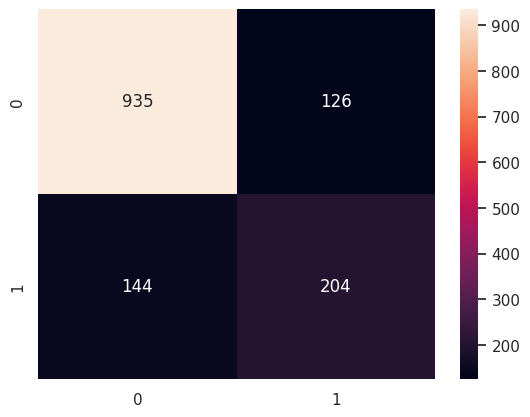

In [112]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot= True, fmt='0.0f')

In [113]:
(Tn, Fp), (Fn, Tp) = cm

In [114]:
print('True Negative: ', Tn)
print('False Positive: ', Fp)
print('False Negative: ', Fn)
print('True Positive: ', Tp)

True Negative:  935
False Positive:  126
False Negative:  144
True Positive:  204
